In [1]:
import pandas as pd
import numpy as np
import requests
import random
import time
from matplotlib import pyplot as plt

In [10]:
start_time = time.time()

numRows = 27185885 #total number of rows in dataset
num_rows_to_read = 10000000 #number of rows of dataset to read
skip = sorted(random.sample(range(1,numRows),numRows-num_rows_to_read)) #randomly sample n rows from the 27M

cases = pd.read_csv('C:/Users/rpeck/Downloads/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv', skiprows=skip,dtype={'county_fips_code': str})
cases = cases[~(cases['hosp_yn']=='missing')]
cases = cases[~(cases['county_fips_code'].isna())]
print("--- %s s ---" % ((time.time() - start_time)))

c:\users\rpeck\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


--- 81.45948886871338 s ---


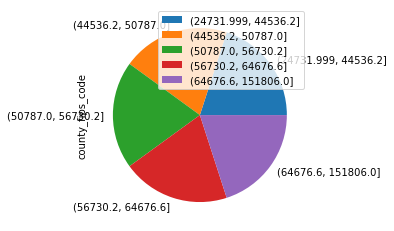

In [52]:
poverty = pd.read_excel('C:/Users/rpeck/Downloads/est19all.xls', skiprows=3, 
                        dtype={'State FIPS Code': str, 'County FIPS Code': str})
poverty['county_fips_code'] = poverty['State FIPS Code'] + poverty['County FIPS Code'] 
poverty = poverty[~(poverty['Median Household Income']=='.')]
poverty['Median Household Income'] = poverty['Median Household Income'].astype(int)
poverty['Income Bin'] = pd.qcut(poverty['Median Household Income'], 5)
poverty.groupby('Income Bin').count().plot(kind='pie', y='county_fips_code')

In [12]:
population = pd.read_csv('C:/Users/rpeck/Downloads/2010+Census+Population+By+Zipcode+(ZCTA).csv', dtype={'Zip Code ZCTA': str})
population.columns = ['county_fips_code', 'Population']

In [50]:
by_date = cases.merge(poverty, on='county_fips_code').merge(population, on='county_fips_code')
by_date = by_date[by_date['Population'] > np.quantile(by_date['Population'],.1) ] #filter out very small counties which have outsized effects on per capita calculations
by_date['Case Proportion'] = 1/by_date['Population']

summed = by_date.groupby(['case_month', 'Income Bin']).sum().reset_index()
summed = summed[~(summed['Case Proportion'].isna())]
summed = summed[~(summed['Case Proportion'] == np.inf)]
summed
# summed['per 100,000'] = summed['Case Proportion'] * 100000
# summed.pivot(index = 'case_month', columns='Income Bin', values='Case Proportion').plot()

MemoryError: Unable to allocate 1.13 GiB for an array with shape (16, 9439714) and data type object

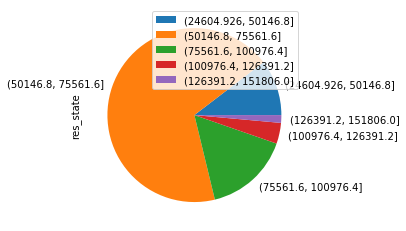

In [40]:
by_date.groupby('Income Bin').count().plot(kind='pie', y='res_state')

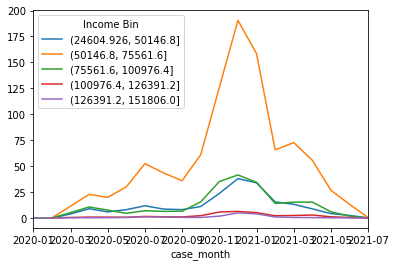

In [30]:
by_date.pivot(index = 'case_month', columns='Income Bin', values='Case Proportion').plot()

In [28]:
np.quantile(by_date['Population'],.1)

510.0

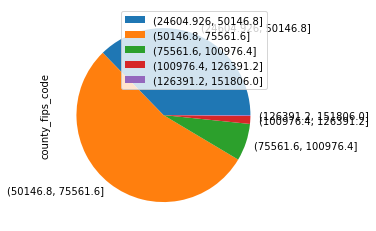

(array([2.58719e+06, 6.84916e+05, 7.21347e+05, 3.32134e+05, 5.14730e+04,
        3.77600e+04, 2.76600e+04, 8.07090e+04, 9.65700e+03, 1.78600e+03]),
 array([1.00000e+01, 7.84960e+03, 1.56892e+04, 2.35288e+04, 3.13684e+04,
        3.92080e+04, 4.70476e+04, 5.48872e+04, 6.27268e+04, 7.05664e+04,
        7.84060e+04]),
 <a list of 10 Patch objects>)

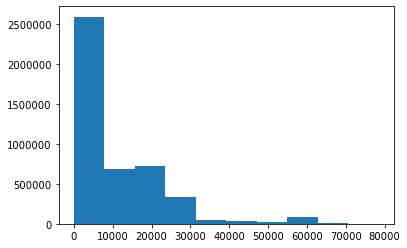

In [23]:
by_date = by_date[~(by_date['Population'] == 0)]
plt.hist(by_date['Population'])
#by_date['Case Proportion'] = 1/by_date['Population']



In [ ]:
by_date = cases.merge(poverty, on='county_fips_code').groupby(['case_month', 'Income Bin']).count().reset_index()
by_date = by_date[~(by_date['res_state'].isna())]

In [ ]:
by_date

In [ ]:
by_date.pivot(index = 'case_month', columns='Income Bin', values='res_state').plot()

In [ ]:
plt.hist(sorted([x for x in poverty['Median Household Income'].values if not '.' in str(x)]), bins=30)

In [ ]:
cases.groupby('case_month')

In [ ]:
rows_to_skip = [x for x in np.arange(1,100,1).tolist() if x not in random.sample(range(1,100),10)]

In [ ]:
timeit
print('hi')

In [ ]:
cases[~(cases['county_fips_code'].isna())]

In [ ]:
###plot scatterplot of median income vs Cases/CFR/IFR
##control for demographics see if there's anything there
###control for vaccination rate and see if there's anything there